<a href="https://colab.research.google.com/github/ronincodex/verbose-octo-fiesta/blob/master/Live_Twitter_Data_Sentiment_Analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Description:This program take the sentiment of Bitcoin from Twitter users

In [3]:
#Importing librarires
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Uplaod the login files
from google.colab import files
files.upload()

Saving NewLogin.csv to NewLogin.csv


{'NewLogin.csv': b'"key"\n"GN514XEaObUTQUoBKZm5Tagu9"\n"eU3AW2BaumxYRAnKRQk6P5wqhjI0llQXyLLkbpSSo5EuoB0zpz"\n"1141913556071268353-1lpF6wXmJ8YKZTKTeQ12ag0gSf9K1Z"\n"2dLukpJSrmr01RRgCITMb1oYhKtgrceX7ladtae1fGeus"\n'}

In [5]:
#Store the data
log = pd.read_csv('NewLogin.csv')

In [6]:
#Get the Twitter API credentials
consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]

In [7]:
#Create authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
#Set access token and the access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)
#Create the API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [8]:
#Gather 5000 tweets about Bitcoin
search_term = '#bitcoin -filter:retweets'
#create cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since= '2019-02-01', tweet_mode= 'extended').items(5000)
#Store the tweets in a variable and get full text
all_tweets = [tweet.full_text for tweet in tweets]

In [9]:
# Create a dataframe to store the tweets with a column called 'Tweets'
pd.options.display.max_colwidth = -1
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#Show the 1st  20 rows of Twitter data
df.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Tweets
0,@META1Coin Excellent Project\nhaving great value in the Cryptocurrency. Maintain highly spirited and dedicated team of professionals.\n\n@KyawGyi08153519\n@TheinThanZaw15\n@BoTint12\n\n#Airdrops #Bitcoin #crypto #Blockchain #META1Coin
1,"1 #Bitcoin = 100,000,000 Satoshis\n1 #Etherium = 1 ETH\n1 #Chainlink = 1 LINK\n1 #altcoin = 1 ALTCOIN\n\nSee why your altcoin will never be a currency?\nYou want your altcoin to moon but if it does then it makes it even more useless as a currency\n\n#BTC is SOV &amp; currency"
2,"I bought a 1980's Mercedes SL with #bitcoin profits in 2017\n\nIt leaked, broke down the whole time, &amp; I sold it for £6000\n\nHad I simply held that btc it would be worth almost £200,000.... The strategy is simple friends: HODL"
3,He has no #Bitcoin . But they warned in advance that he should buy #Bitcoin. That’s so bad.\n\nImagine you have never owned #Bitcoin like him. https://t.co/SXDPGcR5IM
4,Study Diploma of Blockchain with us. Call us to know more- +91 89700 78000/98159 00757/83604 78940 \nhttps://t.co/5N0WMCWbuQ\n#blockchain #bitcoin #cryptocurrency #crypto #ethereum #blockchaincourses #eduxpress #blockchainaustralia #blockxpress #studyblockchain #enrolnow #contactus https://t.co/aG2XIaL4ed
5,🤝 Follow me on @betfury. Let's hunt for Bitcoins together! Get an exciting experience on #1 I-Gaming platform with #BTC staking payouts!💰.My Username: User816431 #betfurysuccess #bitcoin #staking
6,Are you ready for Tipcoin to change the gambling and crypto game? Be sure to join our telegram group and follow us on twitter for the latest updates. https://t.co/dUhExypRJ9 https://t.co/te7ZrCoOtS #tipcoin #bsc #bitcoin #BinanceSmartChain #Binance
7,@CNBC $AMC and #Bitcoin https://t.co/JYFUznzbI0
8,Small gains today 😁\n\nPlease follow for support 🙏\n\n#Holo #wın #shiba #SHIB #akita #safemars #safemooon @Expert_Crypto_ @HamsterCoi #btt #Bitcoin #BTC #doge #Chiliz @cz_binance #Crypto #Coinbase #Binance #BNB #BabyDoge #SunatullahSaadat #ComeToBesiktas @assfinance @CryptoFinally https://t.co/8J0J3S1ctK
9,"If you want to make money in Trading, kindly hit the link: https://t.co/K9CaqyXoj4\nOr if you are interested in Bitcoin Mining, hit this link: https://t.co/R5MmaKrXod\nShare or retweet if you think this useful\n#Bitcoin #Forex"


In [10]:
#Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #Removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt) #Removes the '#' from Bitcoin
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #Remove any strings with a '#'
  twt = re.sub('\\n', '', twt) #Removes the '\n' string
  twt = re.sub('https?:\/\/S+', '', twt) #Removes any hyperlinks
  twt = re.sub(':', '', twt) #Removes ':' from string
  twt = re.sub('@', '', twt) #Removes '@' from string
  return twt

In [11]:
#Clean the tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
#Show the data set
df.head(20)

,Tweets,Cleaned_Tweets
0,@META1Coin Excellent Project\nhaving great value in the Cryptocurrency. Maintain highly spirited and dedicated team of professionals.\n\n@KyawGyi08153519\n@TheinThanZaw15\n@BoTint12\n\n#Airdrops #Bitcoin #crypto #Blockchain #META1Coin,META1Coin Excellent Projecthaving great value in the Cryptocurrency. Maintain highly spirited and dedicated team of professionals.KyawGyi08153519TheinThanZaw15BoTint12 Bitcoin
1,"1 #Bitcoin = 100,000,000 Satoshis\n1 #Etherium = 1 ETH\n1 #Chainlink = 1 LINK\n1 #altcoin = 1 ALTCOIN\n\nSee why your altcoin will never be a currency?\nYou want your altcoin to moon but if it does then it makes it even more useless as a currency\n\n#BTC is SOV &amp; currency","1 Bitcoin = 100,000,000 Satoshis1 = 1 ETH1 = 1 LINK1 = 1 ALTCOINSee why your altcoin will never be a currency?You want your altcoin to moon but if it does then it makes it even more useless as a currency is SOV &amp; currency"
2,"I bought a 1980's Mercedes SL with #bitcoin profits in 2017\n\nIt leaked, broke down the whole time, &amp; I sold it for £6000\n\nHad I simply held that btc it would be worth almost £200,000.... The strategy is simple friends: HODL","I bought a 1980's Mercedes SL with bitcoin profits in 2017It leaked, broke down the whole time, &amp; I sold it for £6000Had I simply held that btc it would be worth almost £200,000.... The strategy is simple friends HODL"
3,He has no #Bitcoin . But they warned in advance that he should buy #Bitcoin. That’s so bad.\n\nImagine you have never owned #Bitcoin like him. https://t.co/SXDPGcR5IM,He has no Bitcoin . But they warned in advance that he should buy Bitcoin. That’s so bad.Imagine you have never owned Bitcoin like him. https//t.co/SXDPGcR5IM
4,Study Diploma of Blockchain with us. Call us to know more- +91 89700 78000/98159 00757/83604 78940 \nhttps://t.co/5N0WMCWbuQ\n#blockchain #bitcoin #cryptocurrency #crypto #ethereum #blockchaincourses #eduxpress #blockchainaustralia #blockxpress #studyblockchain #enrolnow #contactus https://t.co/aG2XIaL4ed,Study Diploma of Blockchain with us. Call us to know more- +91 89700 78000/98159 00757/83604 78940 https//t.co/5N0WMCWbuQ bitcoin https//t.co/aG2XIaL4ed
5,🤝 Follow me on @betfury. Let's hunt for Bitcoins together! Get an exciting experience on #1 I-Gaming platform with #BTC staking payouts!💰.My Username: User816431 #betfurysuccess #bitcoin #staking,🤝 Follow me on betfury. Let's hunt for Bitcoins together! Get an exciting experience on I-Gaming platform with staking payouts!💰.My Username User816431 bitcoin
6,Are you ready for Tipcoin to change the gambling and crypto game? Be sure to join our telegram group and follow us on twitter for the latest updates. https://t.co/dUhExypRJ9 https://t.co/te7ZrCoOtS #tipcoin #bsc #bitcoin #BinanceSmartChain #Binance,Are you ready for Tipcoin to change the gambling and crypto game? Be sure to join our telegram group and follow us on twitter for the latest updates. https//t.co/dUhExypRJ9 https//t.co/te7ZrCoOtS bitcoin
7,@CNBC $AMC and #Bitcoin https://t.co/JYFUznzbI0,CNBC $AMC and Bitcoin https//t.co/JYFUznzbI0
8,Small gains today 😁\n\nPlease follow for support 🙏\n\n#Holo #wın #shiba #SHIB #akita #safemars #safemooon @Expert_Crypto_ @HamsterCoi #btt #Bitcoin #BTC #doge #Chiliz @cz_binance #Crypto #Coinbase #Binance #BNB #BabyDoge #SunatullahSaadat #ComeToBesiktas @assfinance @CryptoFinally https://t.co/8J0J3S1ctK,Small gains today 😁Please follow for support 🙏 ın Expert_Crypto_ HamsterCoi Bitcoin cz_binance assfinance CryptoFinally https//t.co/8J0J3S1ctK
9,"If you want to make money in Trading, kindly hit the link: https://t.co/K9CaqyXoj4\nOr if you are interested in Bitcoin Mining, hit this link: https://t.co/R5MmaKrXod\nShare or retweet if you think this useful\n#Bitcoin #Forex","If you want to make money in Trading, kindly hit the link https//t.co/K9CaqyXoj4Or if you are interested in Bitcoin Mining, hit this link https//t.co/R5MmaKrXodShare or retweet if you think this usefulBitcoin"


In [12]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

#Show the data
df.head(20)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,@META1Coin Excellent Project\nhaving great value in the Cryptocurrency. Maintain highly spirited and dedicated team of professionals.\n\n@KyawGyi08153519\n@TheinThanZaw15\n@BoTint12\n\n#Airdrops #Bitcoin #crypto #Blockchain #META1Coin,META1Coin Excellent Projecthaving great value in the Cryptocurrency. Maintain highly spirited and dedicated team of professionals.KyawGyi08153519TheinThanZaw15BoTint12 Bitcoin,0.916667,0.766667
1,"1 #Bitcoin = 100,000,000 Satoshis\n1 #Etherium = 1 ETH\n1 #Chainlink = 1 LINK\n1 #altcoin = 1 ALTCOIN\n\nSee why your altcoin will never be a currency?\nYou want your altcoin to moon but if it does then it makes it even more useless as a currency\n\n#BTC is SOV &amp; currency","1 Bitcoin = 100,000,000 Satoshis1 = 1 ETH1 = 1 LINK1 = 1 ALTCOINSee why your altcoin will never be a currency?You want your altcoin to moon but if it does then it makes it even more useless as a currency is SOV &amp; currency",0.350000,0.000000
2,"I bought a 1980's Mercedes SL with #bitcoin profits in 2017\n\nIt leaked, broke down the whole time, &amp; I sold it for £6000\n\nHad I simply held that btc it would be worth almost £200,000.... The strategy is simple friends: HODL","I bought a 1980's Mercedes SL with bitcoin profits in 2017It leaked, broke down the whole time, &amp; I sold it for £6000Had I simply held that btc it would be worth almost £200,000.... The strategy is simple friends HODL",0.300635,0.068889
3,He has no #Bitcoin . But they warned in advance that he should buy #Bitcoin. That’s so bad.\n\nImagine you have never owned #Bitcoin like him. https://t.co/SXDPGcR5IM,He has no Bitcoin . But they warned in advance that he should buy Bitcoin. That’s so bad.Imagine you have never owned Bitcoin like him. https//t.co/SXDPGcR5IM,0.000000,0.000000
4,Study Diploma of Blockchain with us. Call us to know more- +91 89700 78000/98159 00757/83604 78940 \nhttps://t.co/5N0WMCWbuQ\n#blockchain #bitcoin #cryptocurrency #crypto #ethereum #blockchaincourses #eduxpress #blockchainaustralia #blockxpress #studyblockchain #enrolnow #contactus https://t.co/aG2XIaL4ed,Study Diploma of Blockchain with us. Call us to know more- +91 89700 78000/98159 00757/83604 78940 https//t.co/5N0WMCWbuQ bitcoin https//t.co/aG2XIaL4ed,0.500000,0.500000
5,🤝 Follow me on @betfury. Let's hunt for Bitcoins together! Get an exciting experience on #1 I-Gaming platform with #BTC staking payouts!💰.My Username: User816431 #betfurysuccess #bitcoin #staking,🤝 Follow me on betfury. Let's hunt for Bitcoins together! Get an exciting experience on I-Gaming platform with staking payouts!💰.My Username User816431 bitcoin,0.800000,0.300000
6,Are you ready for Tipcoin to change the gambling and crypto game? Be sure to join our telegram group and follow us on twitter for the latest updates. https://t.co/dUhExypRJ9 https://t.co/te7ZrCoOtS #tipcoin #bsc #bitcoin #BinanceSmartChain #Binance,Are you ready for Tipcoin to change the gambling and crypto game? Be sure to join our telegram group and follow us on twitter for the latest updates. https//t.co/dUhExypRJ9 https//t.co/te7ZrCoOtS bitcoin,0.672222,0.200000
7,@CNBC $AMC and #Bitcoin https://t.co/JYFUznzbI0,CNBC $AMC and Bitcoin https//t.co/JYFUznzbI0,0.000000,0.000000
8,Small gains today 😁\n\nPlease follow for support 🙏\n\n#Holo #wın #shiba #SHIB #akita #safemars #safemooon @Expert_Crypto_ @HamsterCoi #btt #Bitcoin #BTC #doge #Chiliz @cz_binance #Crypto #Coinbase #Binance #BNB #BabyDoge #SunatullahSaadat #ComeToBesiktas @assfinance @CryptoFinally https://t.co/8J0J3S1ctK,Small gains today 😁Please follow for support 🙏 ın Expert_Crypto_ HamsterCoi Bitcoin cz_binance assfinance CryptoFinally https//t.co/8J0J3S1ctK,0.400000,-0.250000
9,"If you want to make money in Trading, kindly hit the link: https://t.co/K9CaqyXoj4\nOr if you are interested in Bitcoin Mining, hit this link: https://t.co/R5MmaKrXod\nShare or retweet if you think this useful\n#Bitcoin #Forex","If you want to make money in 

In [13]:
#Create a function to get the sentiment text
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'   

In [14]:
#Create a column to store the text sentiment 
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#Show the data
df.head(20)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,@META1Coin Excellent Project\nhaving great value in the Cryptocurrency. Maintain highly spirited and dedicated team of professionals.\n\n@KyawGyi08153519\n@TheinThanZaw15\n@BoTint12\n\n#Airdrops #Bitcoin #crypto #Blockchain #META1Coin,META1Coin Excellent Projecthaving great value in the Cryptocurrency. Maintain highly spirited and dedicated team of professionals.KyawGyi08153519TheinThanZaw15BoTint12 Bitcoin,0.916667,0.766667,Positive
1,"1 #Bitcoin = 100,000,000 Satoshis\n1 #Etherium = 1 ETH\n1 #Chainlink = 1 LINK\n1 #altcoin = 1 ALTCOIN\n\nSee why your altcoin will never be a currency?\nYou want your altcoin to moon but if it does then it makes it even more useless as a currency\n\n#BTC is SOV &amp; currency","1 Bitcoin = 100,000,000 Satoshis1 = 1 ETH1 = 1 LINK1 = 1 ALTCOINSee why your altcoin will never be a currency?You want your altcoin to moon but if it does then it makes it even more useless as a currency is SOV &amp; currency",0.350000,0.000000,Neutral
2,"I bought a 1980's Mercedes SL with #bitcoin profits in 2017\n\nIt leaked, broke down the whole time, &amp; I sold it for £6000\n\nHad I simply held that btc it would be worth almost £200,000.... The strategy is simple friends: HODL","I bought a 1980's Mercedes SL with bitcoin profits in 2017It leaked, broke down the whole time, &amp; I sold it for £6000Had I simply held that btc it would be worth almost £200,000.... The strategy is simple friends HODL",0.300635,0.068889,Positive
3,He has no #Bitcoin . But they warned in advance that he should buy #Bitcoin. That’s so bad.\n\nImagine you have never owned #Bitcoin like him. https://t.co/SXDPGcR5IM,He has no Bitcoin . But they warned in advance that he should buy Bitcoin. That’s so bad.Imagine you have never owned Bitcoin like him. https//t.co/SXDPGcR5IM,0.000000,0.000000,Neutral
4,Study Diploma of Blockchain with us. Call us to know more- +91 89700 78000/98159 00757/83604 78940 \nhttps://t.co/5N0WMCWbuQ\n#blockchain #bitcoin #cryptocurrency #crypto #ethereum #blockchaincourses #eduxpress #blockchainaustralia #blockxpress #studyblockchain #enrolnow #contactus https://t.co/aG2XIaL4ed,Study Diploma of Blockchain with us. Call us to know more- +91 89700 78000/98159 00757/83604 78940 https//t.co/5N0WMCWbuQ bitcoin https//t.co/aG2XIaL4ed,0.500000,0.500000,Positive
5,🤝 Follow me on @betfury. Let's hunt for Bitcoins together! Get an exciting experience on #1 I-Gaming platform with #BTC staking payouts!💰.My Username: User816431 #betfurysuccess #bitcoin #staking,🤝 Follow me on betfury. Let's hunt for Bitcoins together! Get an exciting experience on I-Gaming platform with staking payouts!💰.My Username User816431 bitcoin,0.800000,0.300000,Positive
6,Are you ready for Tipcoin to change the gambling and crypto game? Be sure to join our telegram group and follow us on twitter for the latest updates. https://t.co/dUhExypRJ9 https://t.co/te7ZrCoOtS #tipcoin #bsc #bitcoin #BinanceSmartChain #Binance,Are you ready for Tipcoin to change the gambling and crypto game? Be sure to join our telegram group and follow us on twitter for the latest updates. https//t.co/dUhExypRJ9 https//t.co/te7ZrCoOtS bitcoin,0.672222,0.200000,Positive
7,@CNBC $AMC and #Bitcoin https://t.co/JYFUznzbI0,CNBC $AMC and Bitcoin https//t.co/JYFUznzbI0,0.000000,0.000000,Neutral
8,Small gains today 😁\n\nPlease follow for support 🙏\n\n#Holo #wın #shiba #SHIB #akita #safemars #safemooon @Expert_Crypto_ @HamsterCoi #btt #Bitcoin #BTC #doge #Chiliz @cz_binance #Crypto #Coinbase #Binance #BNB #BabyDoge #SunatullahSaadat #ComeToBesiktas @assfinance @CryptoFinally https://t.co/8J0J3S1ctK,Small gains today 😁Please follow for support 🙏 ın Expert_Crypto_ HamsterCoi Bitcoin cz_binance assfinance CryptoFinally https//t.co/8J0J3S1ctK,0.400000,-0.250000,Negative
9,"If you want to make money in Trading, kindly hit the link: https://t.co/K9CaqyXoj4\nOr if you are interested in Bitcoin Mining, hit this link: https://t.co/R5MmaKrXod\nSh

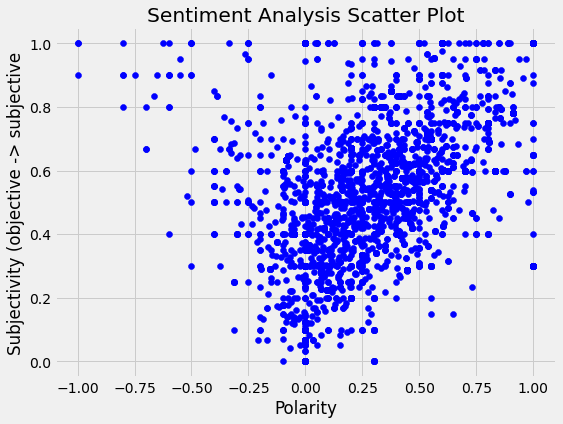

In [15]:
#Create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective')
plt.show()

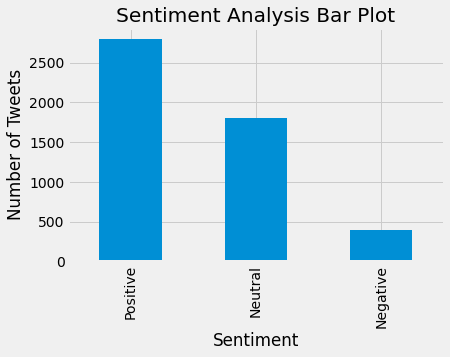

In [16]:
#Create a bar chart to show the count of Positive, Neutral and Negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [17]:
#Create an object for Word Cloud
df_Negative= df.loc[df['Sentiment']== "Negative"]
df_Positive= df.loc[df['Sentiment']== "Positive"]
df_Neutral= df.loc[df['Sentiment']== "Neutral"]

In [18]:
#Create Word Cloud Variable for Positive Negative and Neutral Tweets
allWords_Negative = ' '.join( [twts for twts in df_Negative['Cleaned_Tweets']] )
allWords_Positive = ' '.join( [twts for twts in df_Positive['Cleaned_Tweets']] )
allWords_Neutral = ' '.join( [twts for twts in df_Neutral['Cleaned_Tweets']] )


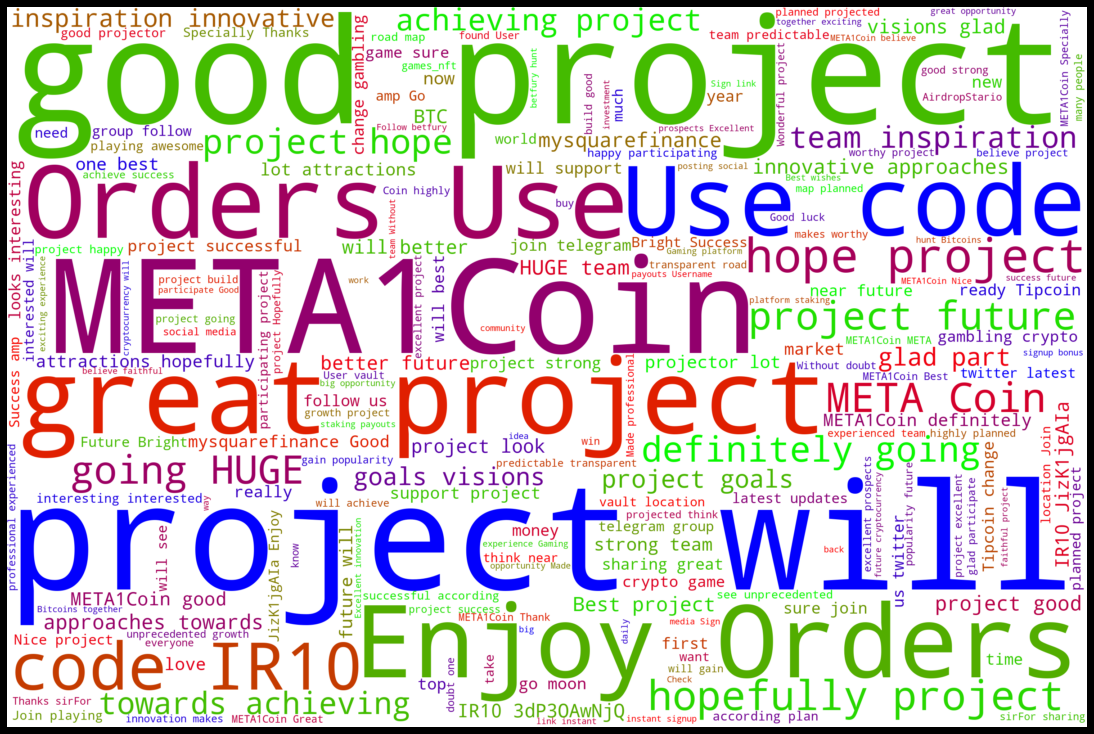

In [19]:
#Wordcloud for Positive Tweets
stopwords = set(STOPWORDS)
stop_words = ["https","Bitcoin","CO","ioda","E0egX01ArP"] + list(STOPWORDS) 
wordcloud = WordCloud(stopwords=stop_words, colormap='brg', background_color='white', width=3000, height=2000).generate(allWords_Positive)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()

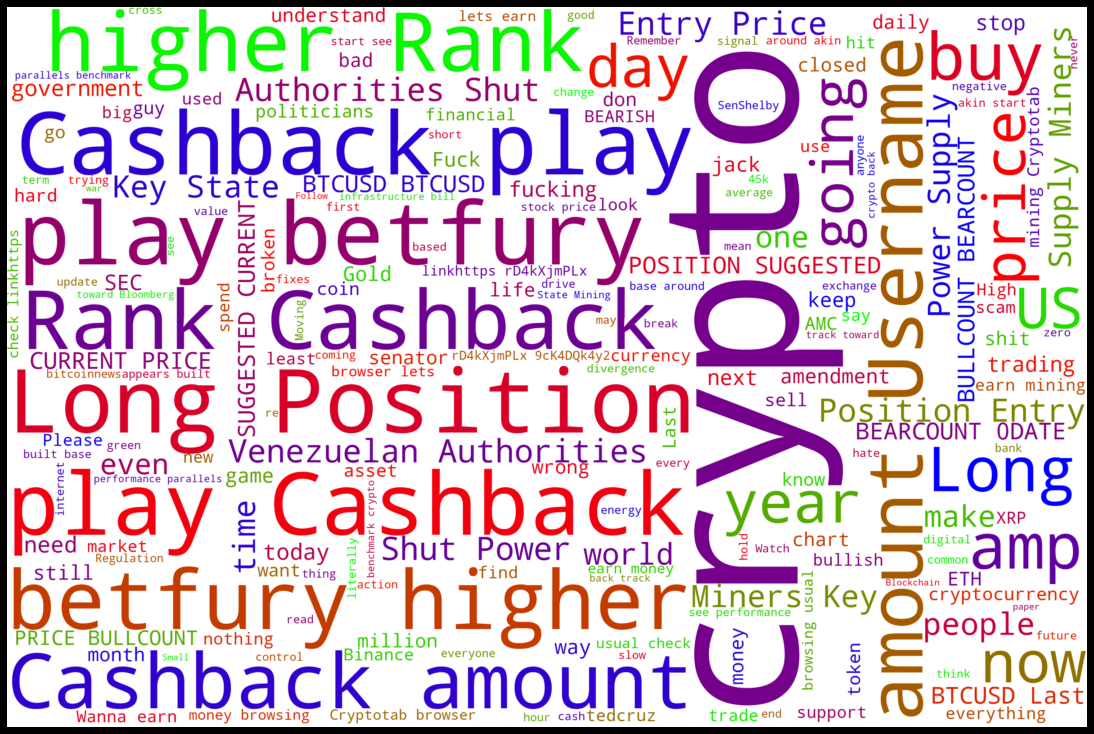

In [22]:
#Wordcloud for Negative Tweets
stopwords = set(STOPWORDS)
stop_words = ["https","Bitcoin","CO","will","BTC","v1", "50SIGNAL"] + list(STOPWORDS) 
wordcloud = WordCloud(stopwords=stop_words, colormap='brg', background_color='white', width=3000, height=2000).generate(allWords_Negative)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()

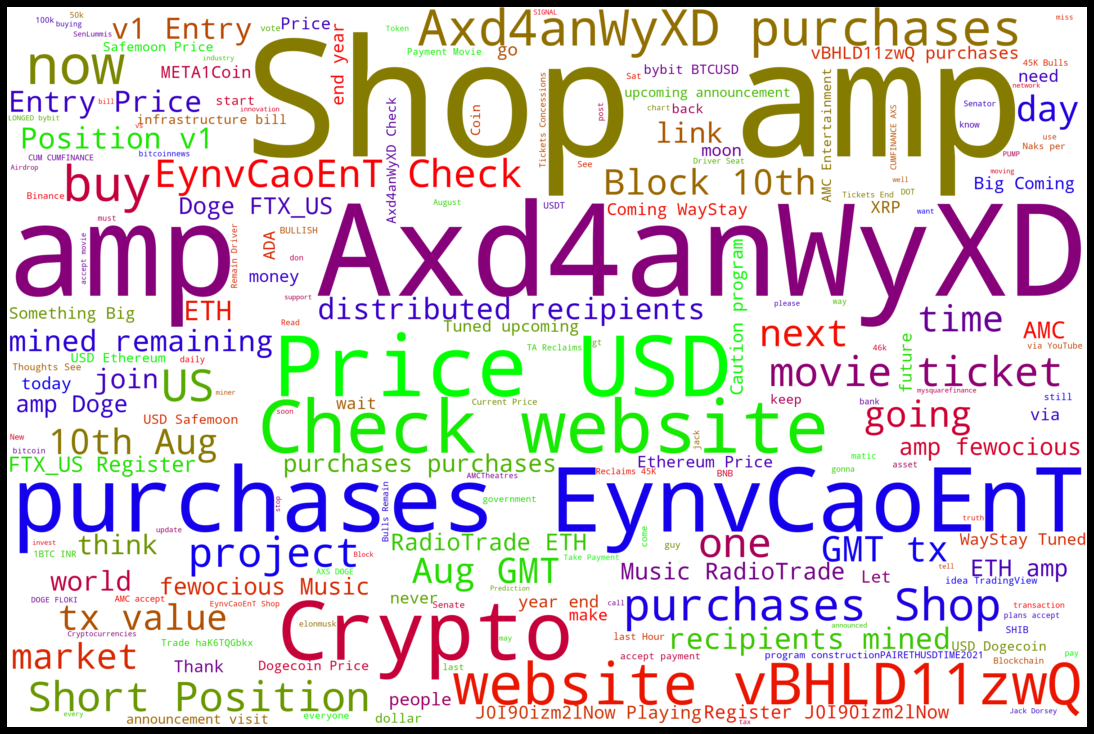

In [21]:
#Wordcloud for Neutral Tweets
stopwords = set(STOPWORDS)
stop_words = ["https","Bitcoin","CO","will","BTC","E0egX01ArP"] + list(STOPWORDS) 
wordcloud = WordCloud(stopwords=stop_words, colormap='brg', background_color='white', width=3000, height=2000).generate(allWords_Neutral)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()